In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df=pd.read_csv("vgsales.csv")

In [166]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Converting Year column from float to datetime

In [168]:
df['Year'] = pd.to_datetime(df['Year'],format ='%Y')

In [169]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Checking for null or missing values

In [211]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [238]:
df.dropna(inplace=True)

Checking for duplicate data

In [239]:
df.duplicated().sum()

0

In [240]:
df['Name'].nunique()

11325

In [241]:
df['Publisher'].nunique()

576

In [242]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [243]:
df['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [244]:
df['Global_Sales'].sum() 

8811.97

### Visualizing the Percentage of Global Sales in million USD

Text(0.5, 1.0, 'Percentage of Global Sales in million USD')

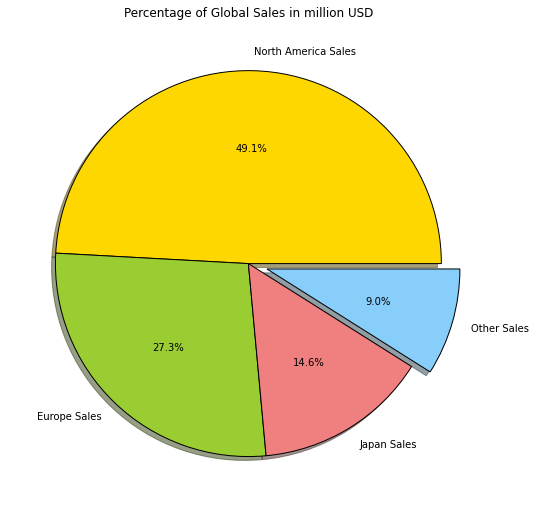

In [247]:
total_NA = df['NA_Sales'].sum()
total_EU = df['EU_Sales'].sum()
total_JP = df['JP_Sales'].sum()
total_Other = df['Other_Sales'].sum()

slices = [total_NA,total_EU,total_JP,total_Other]
labels = ['North America Sales','Europe Sales','Japan Sales','Other Sales']

plt.figure(figsize=(9,7))
plt.pie(slices,labels=labels,wedgeprops ={'edgecolor':'black'},autopct='%1.1f%%',explode=(0,0,0,0.1),shadow=True,colors=['gold','yellowgreen','lightcoral','lightskyblue'])
plt.tight_layout()
plt.title('Percentage of Global Sales in million USD')

### What platforms sold the games?

Grouping by platforms

In [248]:
byplatform=df.groupby(['Platform'],as_index=False).sum()

In [249]:
byplatform

,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,506090,80.78,4.86,0.00,0.84,86.57
1,3DO,43118,0.00,0.00,0.10,0.00,0.10
2,3DS,4546735,78.03,58.29,97.30,12.55,246.27
3,DC,456114,5.43,1.69,8.56,0.27,15.97
4,DS,20460770,388.53,194.05,175.02,60.29,818.91
5,GB,330398,113.64,47.51,85.12,8.16,254.42
6,GBA,6865394,178.43,72.49,46.56,7.51,305.62
7,GC,4670592,131.94,38.32,21.34,5.13,197.14
8,GEN,190019,19.27,5.52,2.67,0.89,28.36
9,GG,13527,0.00,0.00,0.04,0.00,0.04


Top 25 platforms by global sales

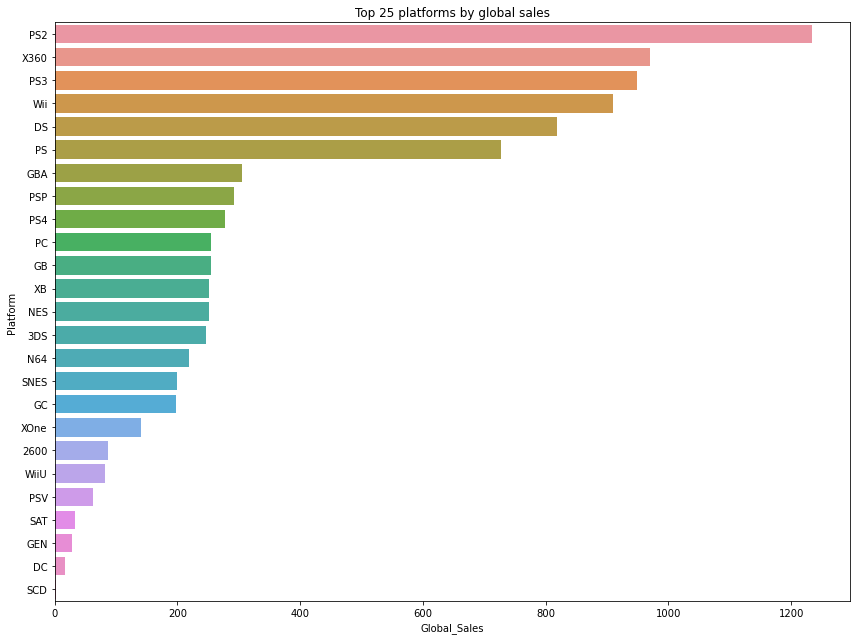

In [250]:
top_platform=byplatform.sort_values(by='Global_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(y='Platform',x='Global_Sales',data=top_platform).set(title='Top 25 platforms by global sales')
plt.tight_layout()

Top 25 platforms by Europe sales

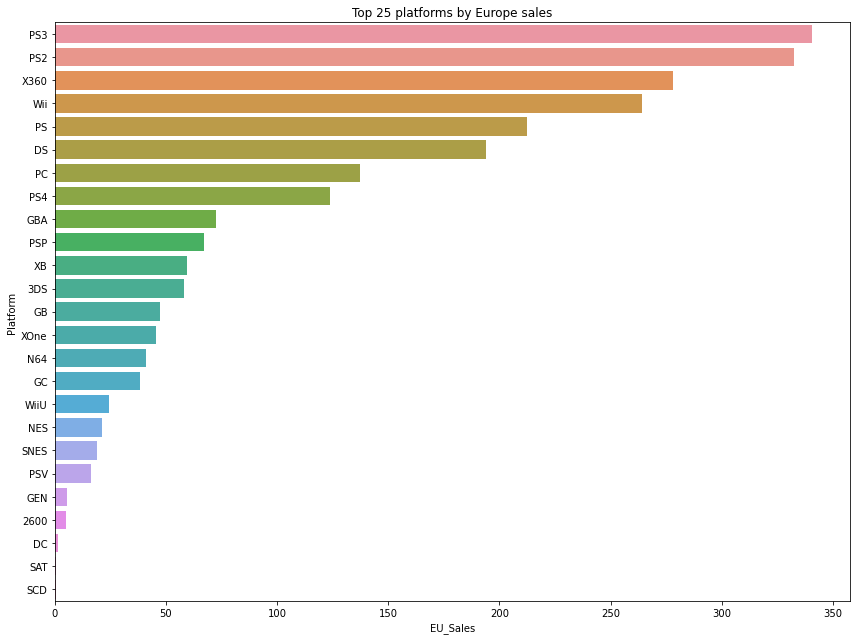

In [251]:
top_platform=byplatform.sort_values(by='EU_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(y='Platform',x='EU_Sales',data=top_platform).set(title='Top 25 platforms by Europe sales')
plt.tight_layout()

Top 25 platforms by Japan sales

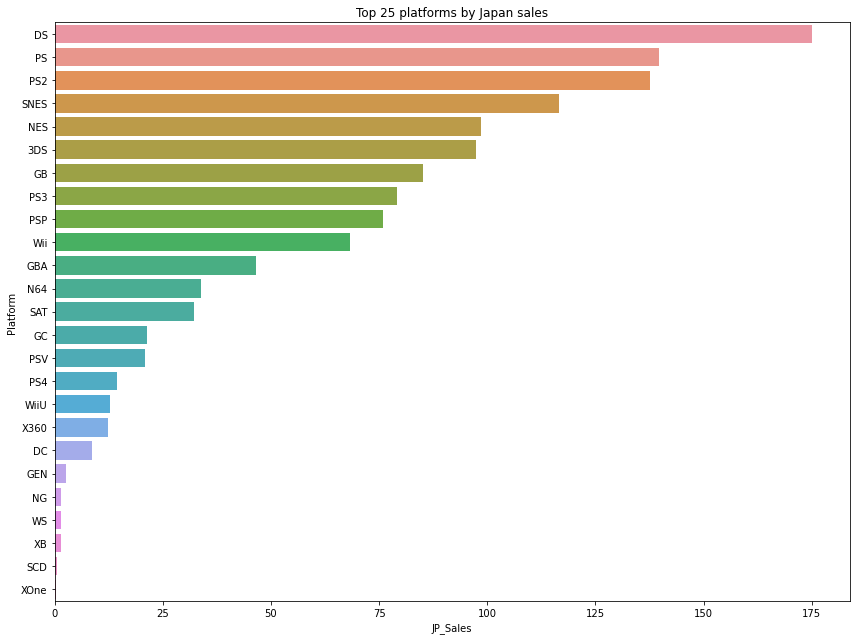

In [252]:
top_platform=byplatform.sort_values(by='JP_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(y='Platform',x='JP_Sales',data=top_platform).set(title='Top 25 platforms by Japan sales')
plt.tight_layout()

Top 25 platforms by North America sales

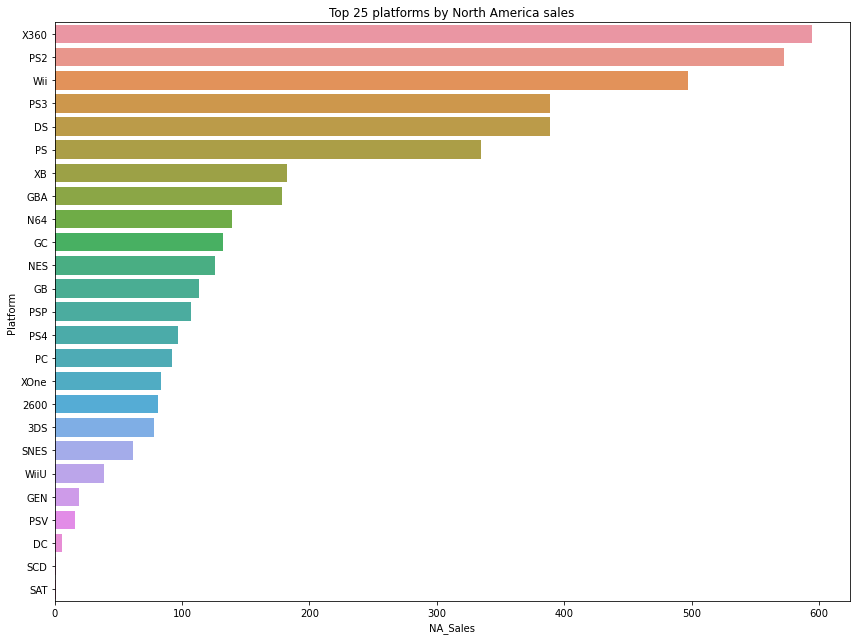

In [278]:
top_platform=byplatform.sort_values(by='NA_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(y='Platform',x='NA_Sales',data=top_platform).set(title='Top 25 platforms by North America sales')
plt.tight_layout()

Top 25 platforms by other sales

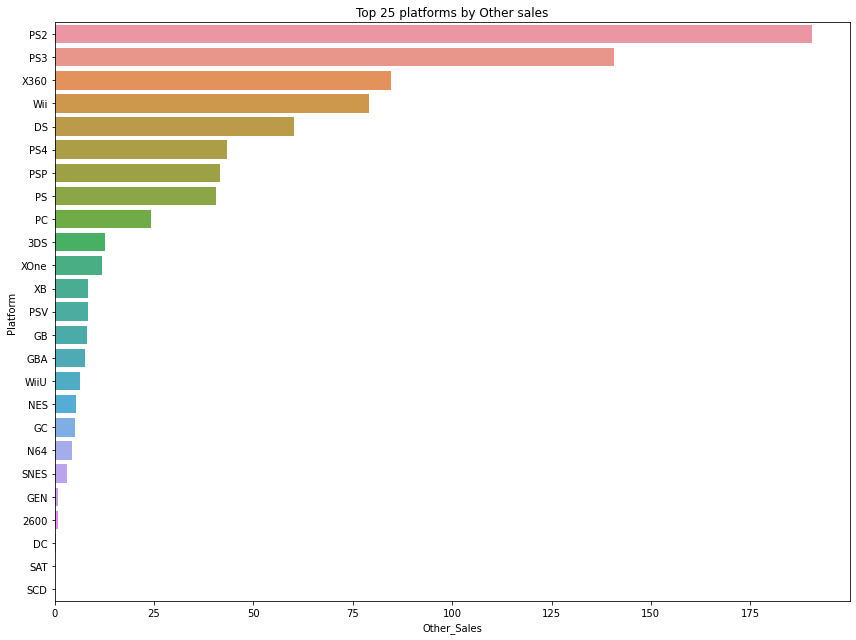

In [254]:
top_platform=byplatform.sort_values(by='Other_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(y='Platform',x='Other_Sales',data=top_platform).set(title='Top 25 platforms by Other sales')
plt.tight_layout()

### Who are the top 25 Publishers by sales?

Grouping by Publisher

In [255]:
bypublisher=df.groupby(['Publisher'],as_index=False).sum()

In [256]:
bypublisher

,Publisher,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,42192,0.07,0.04,0.00,0.00,0.11
1,1C Company,43237,0.01,0.07,0.00,0.02,0.10
2,20th Century Fox Video Games,27266,1.82,0.10,0.00,0.01,1.94
3,2D Boy,14013,0.00,0.03,0.00,0.01,0.04
4,3DO,289344,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...,...
571,id Software,14602,0.02,0.00,0.00,0.00,0.03
572,imageepoch Inc.,30688,0.00,0.00,0.04,0.00,0.04
573,inXile Entertainment,10758,0.02,0.06,0.00,0.01,0.10
574,"mixi, Inc",2411,0.00,0.00,0.86,0.00,0.86


Top 25 publishers by Global sales

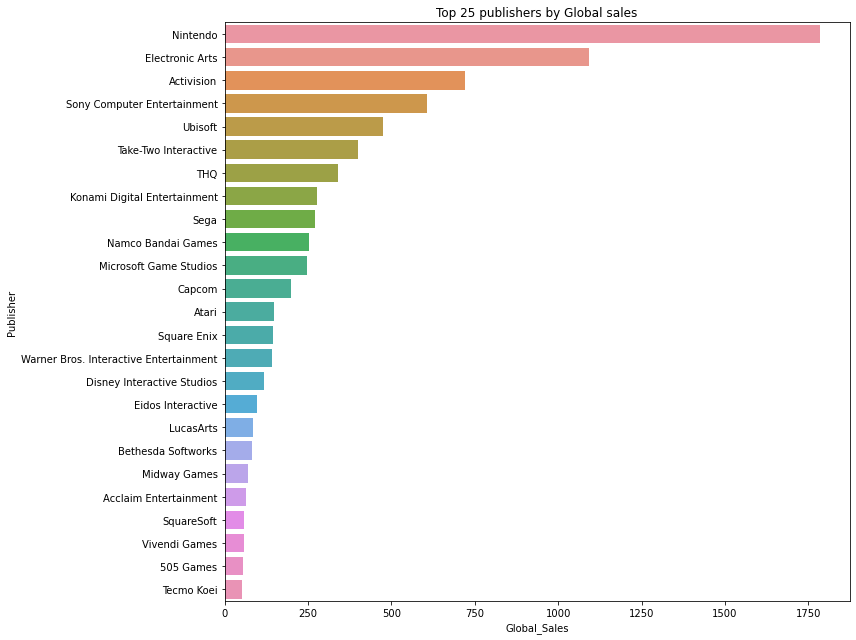

In [257]:
top_publisher=bypublisher.sort_values(by='Global_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='Global_Sales',y='Publisher',data=top_publisher).set(title='Top 25 publishers by Global sales')
plt.tight_layout()

Top 25 publishers by Europe sales

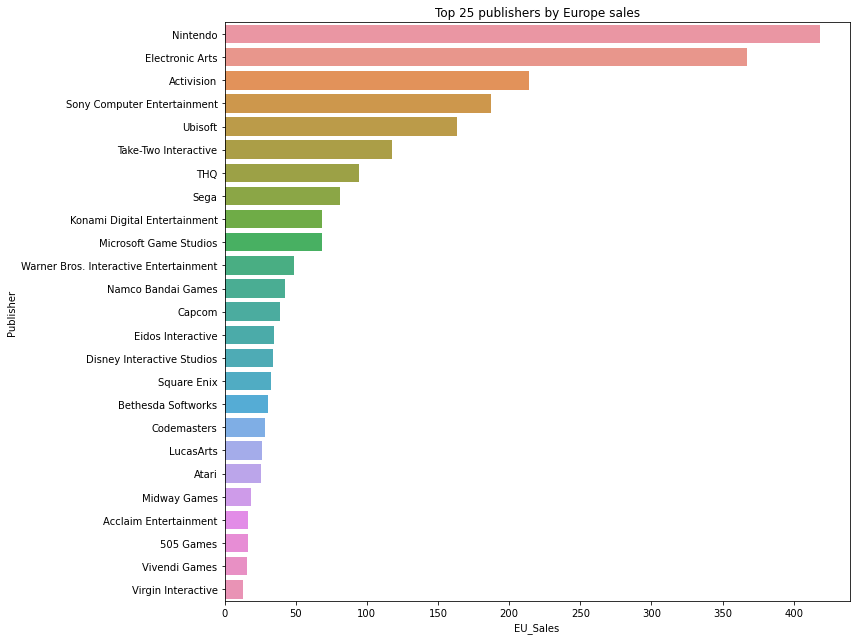

In [258]:
top_publisher=bypublisher.sort_values(by='EU_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='EU_Sales',y='Publisher',data=top_publisher).set(title='Top 25 publishers by Europe sales')
plt.tight_layout()

Top 25 publishers by North America sales

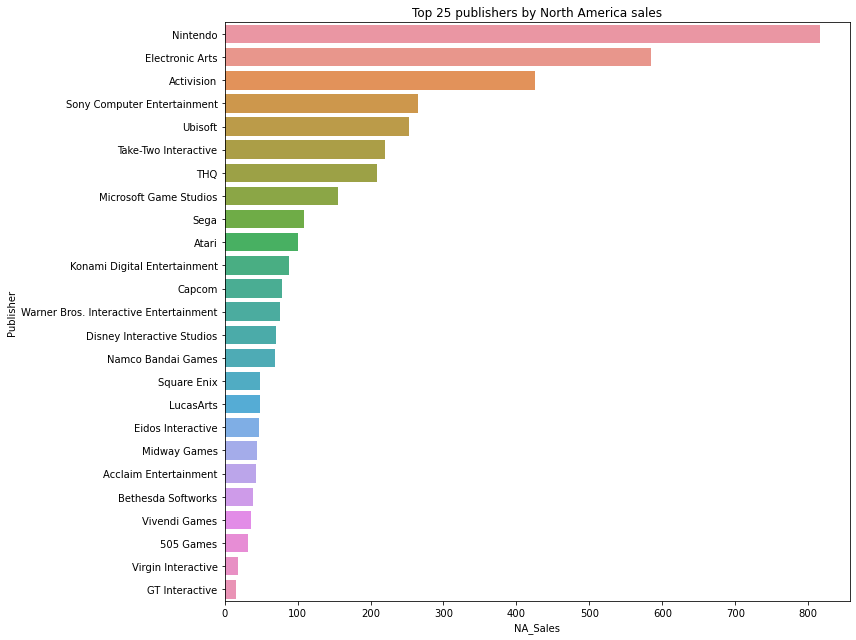

In [259]:
top_publisher=bypublisher.sort_values(by='NA_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='NA_Sales',y='Publisher',data=top_publisher).set(title='Top 25 publishers by North America sales')
plt.tight_layout()

Top 25 publishers by Other sales

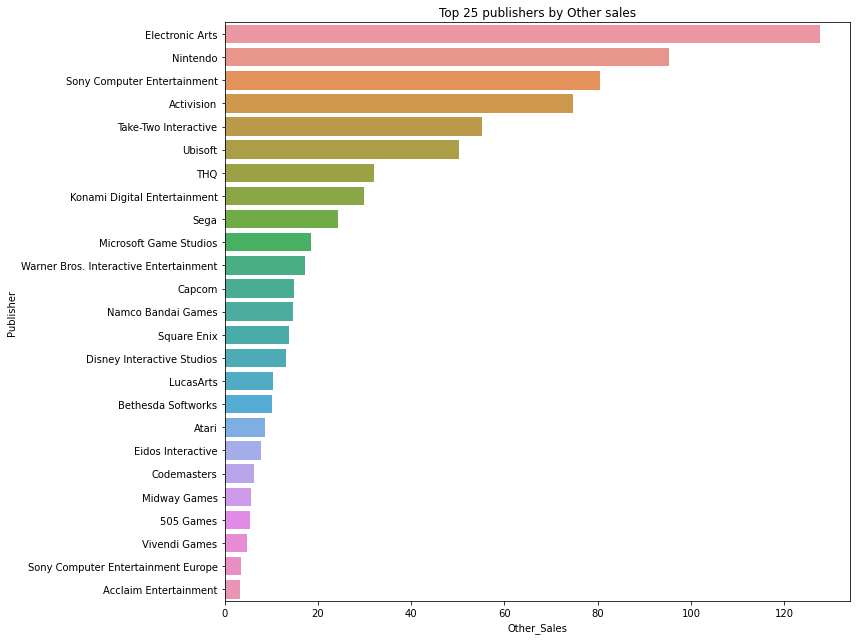

In [260]:
top_publisher=bypublisher.sort_values(by='Other_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='Other_Sales',y='Publisher',data=top_publisher).set(title='Top 25 publishers by Other sales')
plt.tight_layout()

### Sales of top 3 publishers over the years

Nintendo sales over the years

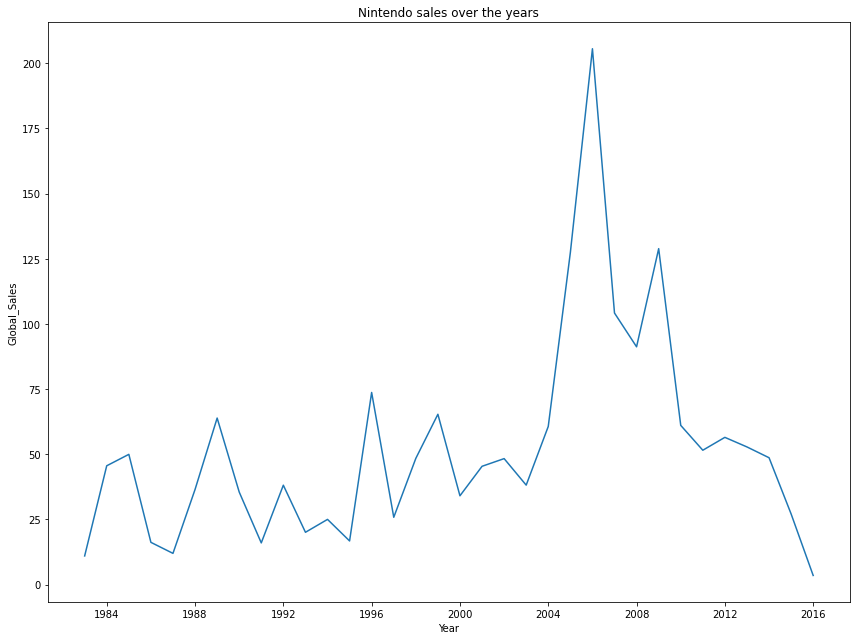

In [261]:
group=df.groupby(['Publisher','Year'],as_index=False).sum().sort_values(['Year'],ascending=False)
group1=group[group['Publisher']=='Nintendo']

plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='Global_Sales',data=group1).set(title='Nintendo sales over the years')
plt.tight_layout()

Electronic Arts sales over the years

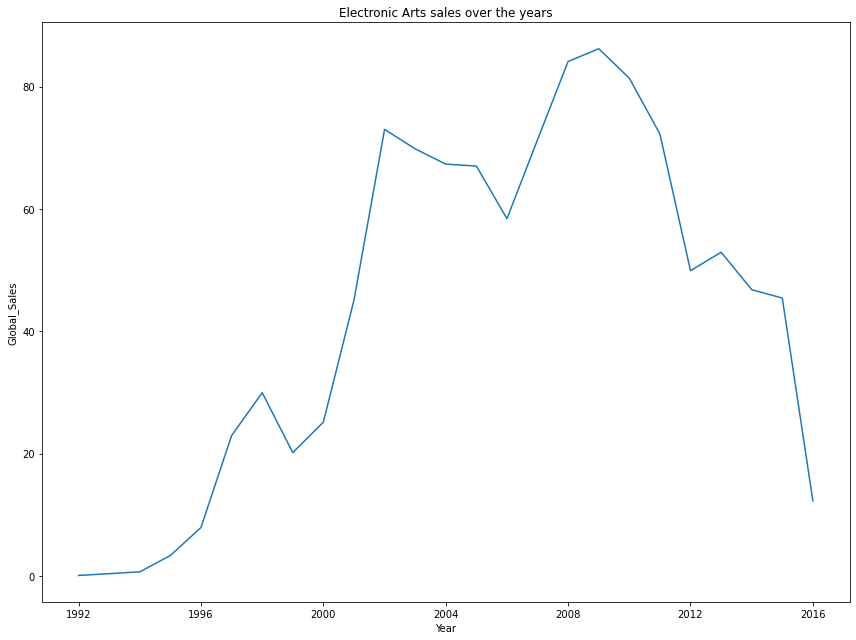

In [262]:
group=df.groupby(['Publisher','Year'],as_index=False).sum().sort_values(['Year'],ascending=False)
group1=group[group['Publisher']=='Electronic Arts']

plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='Global_Sales',data=group1).set(title='Electronic Arts sales over the years')
plt.tight_layout()

Activision sales over the years

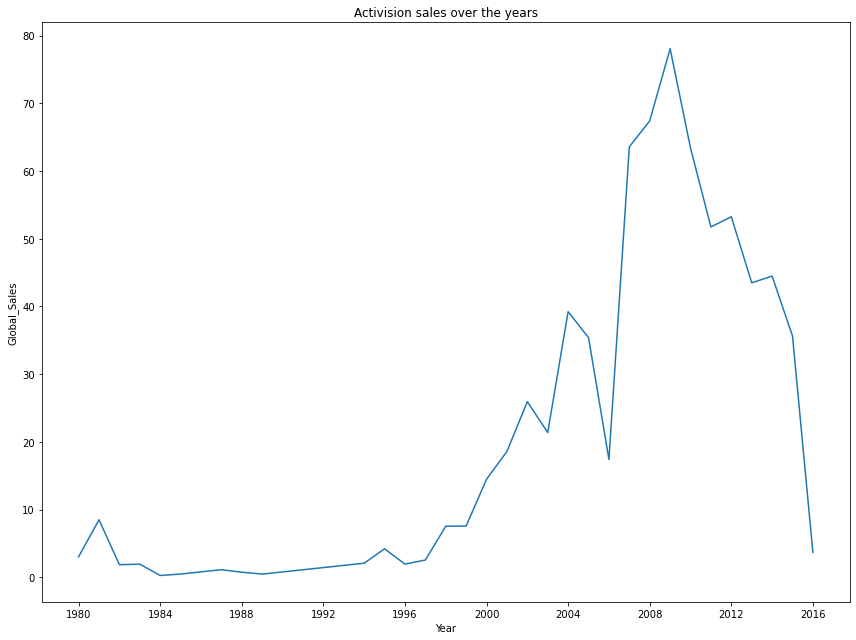

In [263]:
group=df.groupby(['Publisher','Year'],as_index=False).sum().sort_values(['Year'],ascending=False)
group1=group[group['Publisher']=='Activision']

plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='Global_Sales',data=group1).set(title='Activision sales over the years')
plt.tight_layout()

### What genre made most sales?

Grouping by genre

In [264]:
bygenre=df.groupby(['Genre'],as_index=False).sum()

In [265]:
bygenre

,Genre,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,25955792,861.77,516.48,158.65,184.92,1722.84
1,Adventure,14704318,101.93,63.74,51.99,16.70,234.59
2,Fighting,6371780,220.74,100.00,87.15,36.19,444.05
3,Misc,14445141,396.92,211.77,106.67,73.92,789.87
4,Platform,6019939,445.99,200.65,130.65,51.51,829.13
5,Puzzle,5496785,122.01,50.52,56.68,12.47,242.21
6,Racing,9699328,356.93,236.31,56.61,76.68,726.76
7,Role-Playing,11840252,326.50,187.57,350.29,59.38,923.83
8,Shooter,9399409,575.16,310.45,38.18,101.90,1026.20
9,Simulation,7269349,181.78,113.02,63.54,31.36,389.98


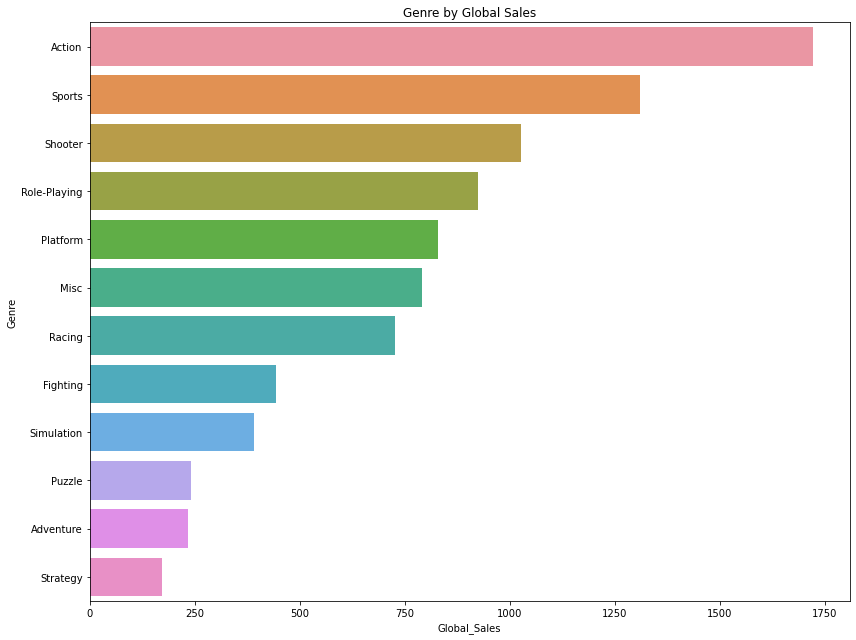

In [266]:
top_genre=bygenre.sort_values(by='Global_Sales',ascending=False)
plt.figure(figsize=(12,9))
sns.barplot(x='Global_Sales',y='Genre',data=top_genre).set(title='Genre by Global Sales')
plt.tight_layout()

Genre by Global Sales

Genre by Europe Sales

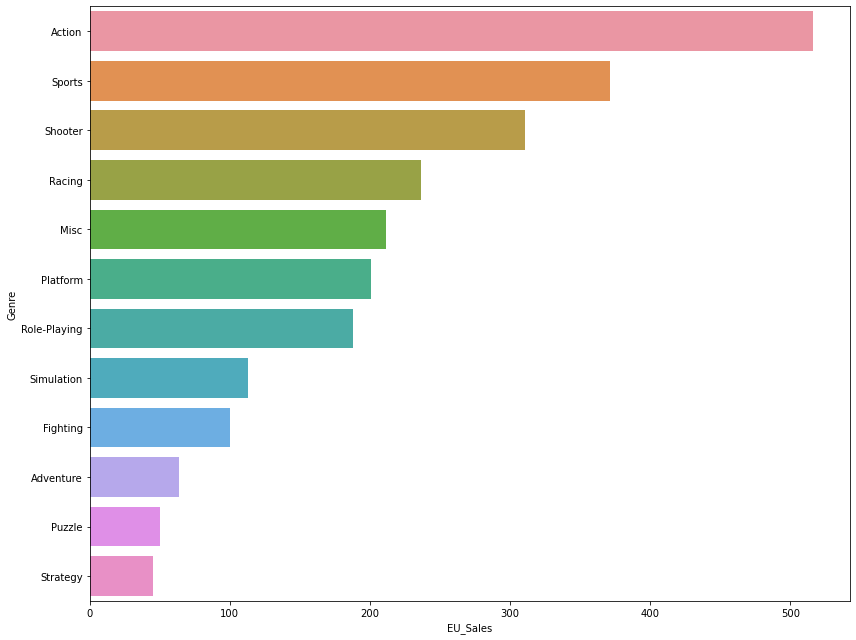

In [267]:
top_genre=bygenre.sort_values(by='EU_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='EU_Sales',y='Genre',data=top_genre)
plt.tight_layout()

Genre by Japan Sales

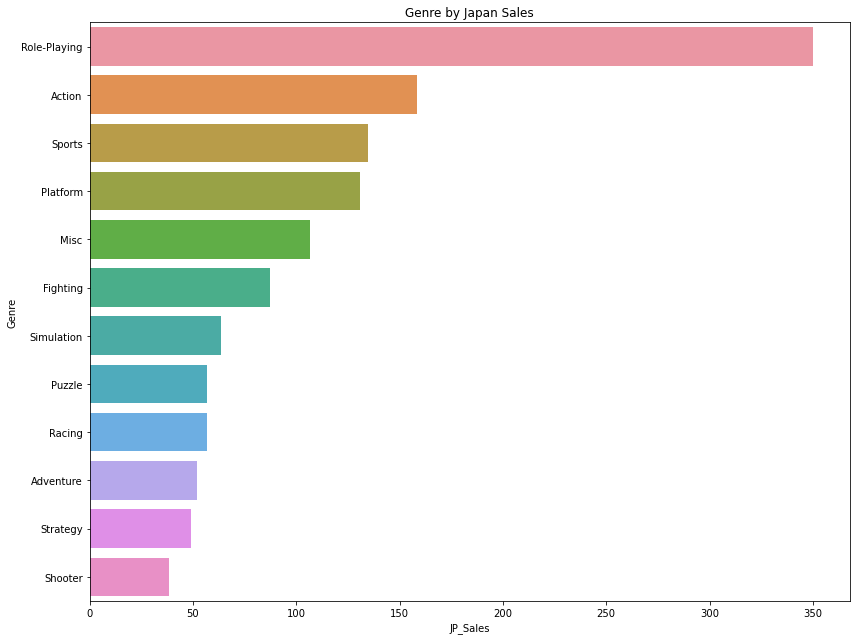

In [268]:
top_genre=bygenre.sort_values(by='JP_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='JP_Sales',y='Genre',data=top_genre).set(title='Genre by Japan Sales')
plt.tight_layout()

Genre by North America Sales

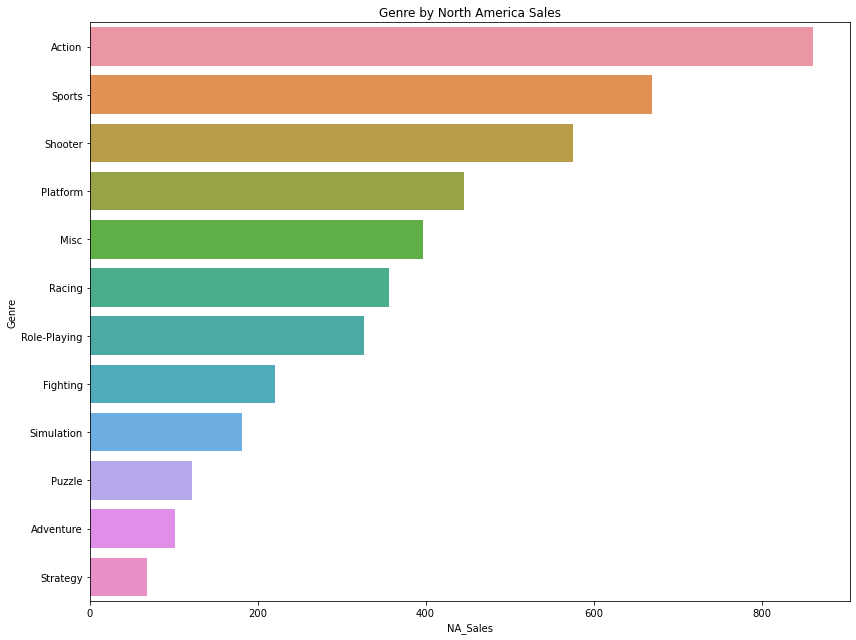

In [269]:
top_genre=bygenre.sort_values(by='NA_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='NA_Sales',y='Genre',data=top_genre).set(title='Genre by North America Sales')
plt.tight_layout()

Genre by Other Sales

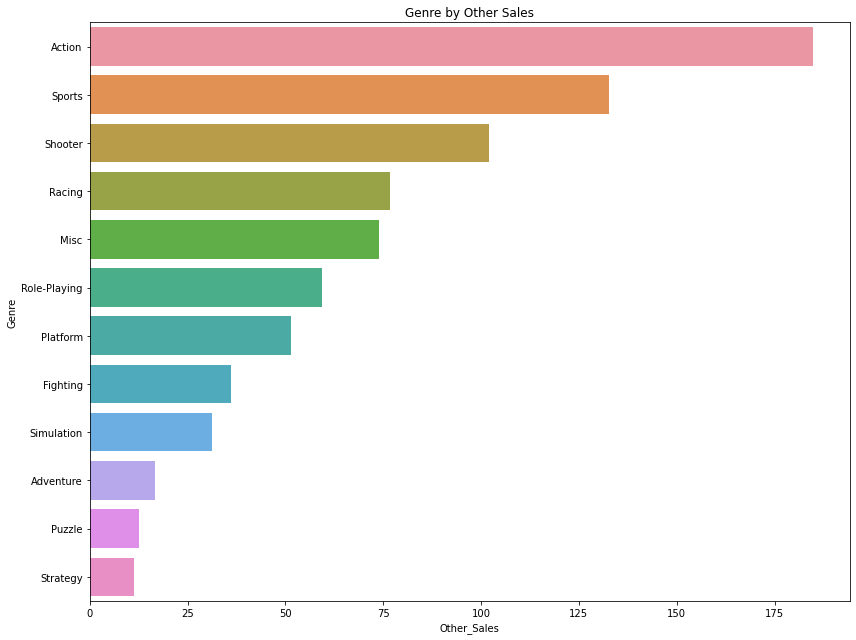

In [270]:
top_genre=bygenre.sort_values(by='Other_Sales',ascending=False).head(25)
plt.figure(figsize=(12,9))
sns.barplot(x='Other_Sales',y='Genre',data=top_genre).set(title='Genre by Other Sales')
plt.tight_layout()

### Which year was most sales made?

Grouping by year

In [271]:
byyear=df.groupby('Year',as_index=False).sum()

In [272]:
byyear

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980-01-01,29826,10.59,0.67,0.00,0.12,11.38
1,1981-01-01,190488,33.40,1.96,0.00,0.32,35.77
2,1982-01-01,149186,26.92,1.65,0.00,0.31,28.86
3,1983-01-01,56759,7.76,0.80,8.10,0.14,16.79
4,1984-01-01,22911,33.28,2.10,14.27,0.70,50.36
5,1985-01-01,55505,33.73,4.74,14.56,0.92,53.94
6,1986-01-01,35986,12.50,2.84,19.81,1.93,37.07
7,1987-01-01,54701,8.46,1.41,11.63,0.20,21.74
8,1988-01-01,37181,23.87,6.59,15.76,0.99,47.22
9,1989-01-01,40156,45.15,8.44,18.36,1.50,73.45


Global sales by year

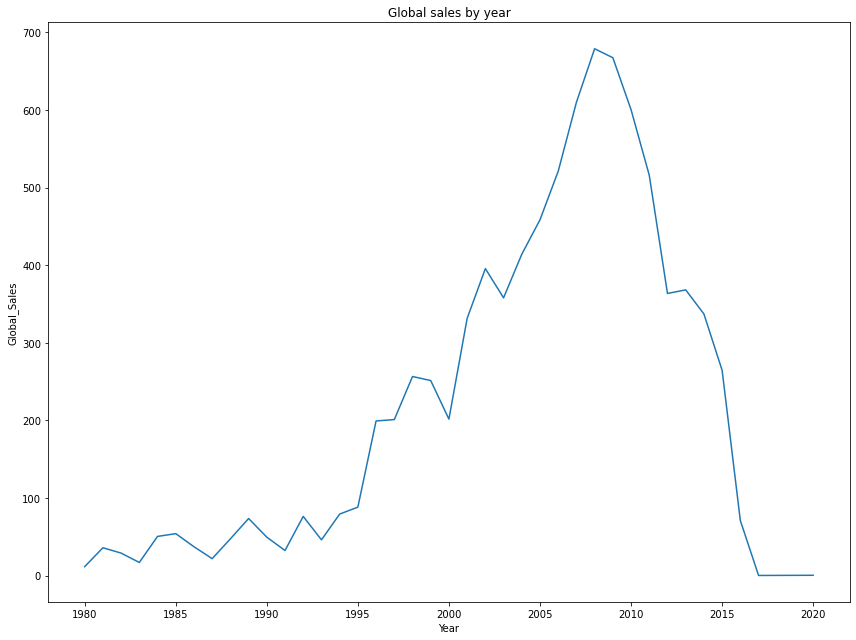

In [273]:
plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='Global_Sales',data=byyear).set(title='Global sales by year')
plt.tight_layout()

Europe sales by year

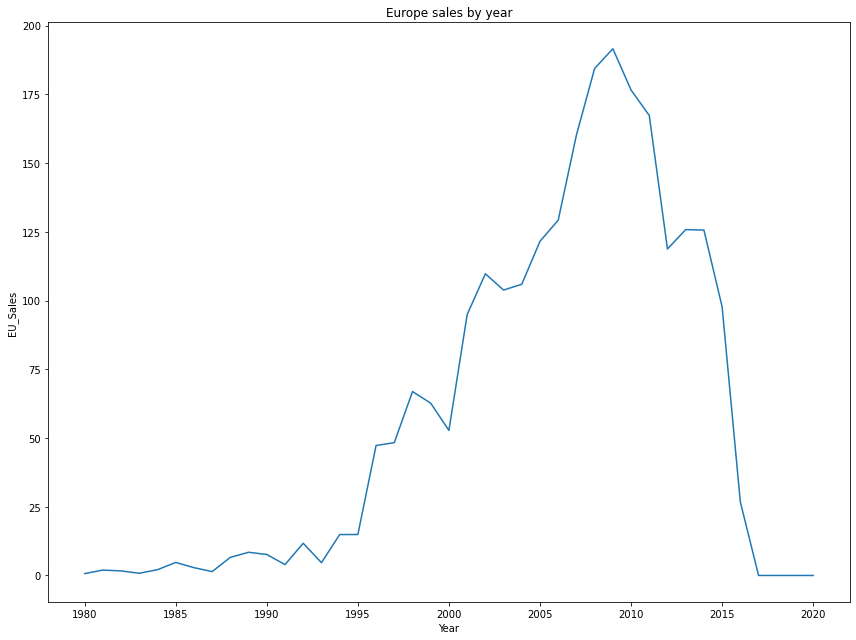

In [274]:
plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='EU_Sales',data=byyear).set(title='Europe sales by year')
plt.tight_layout()

Japan sales by year

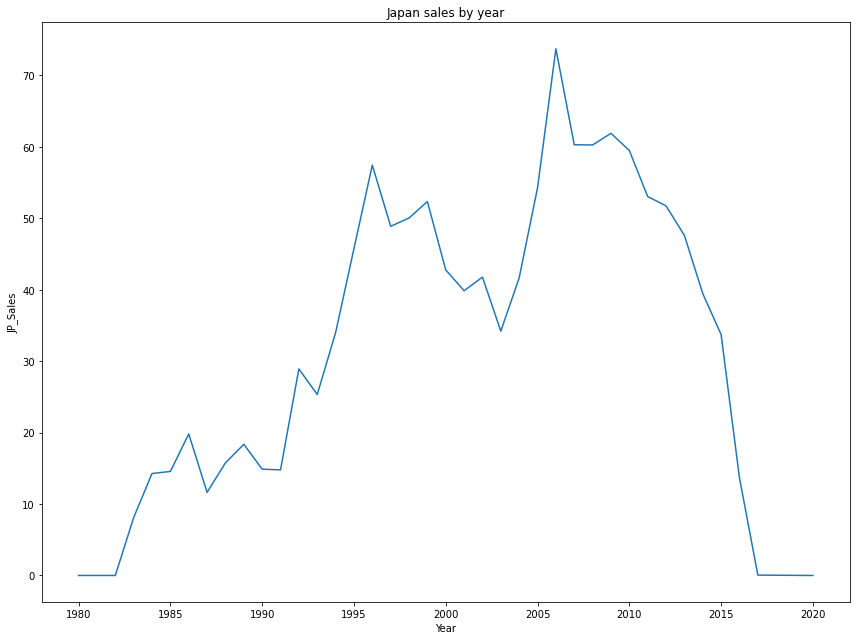

In [275]:
plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='JP_Sales',data=byyear).set(title='Japan sales by year')
plt.tight_layout()

North America sales by year

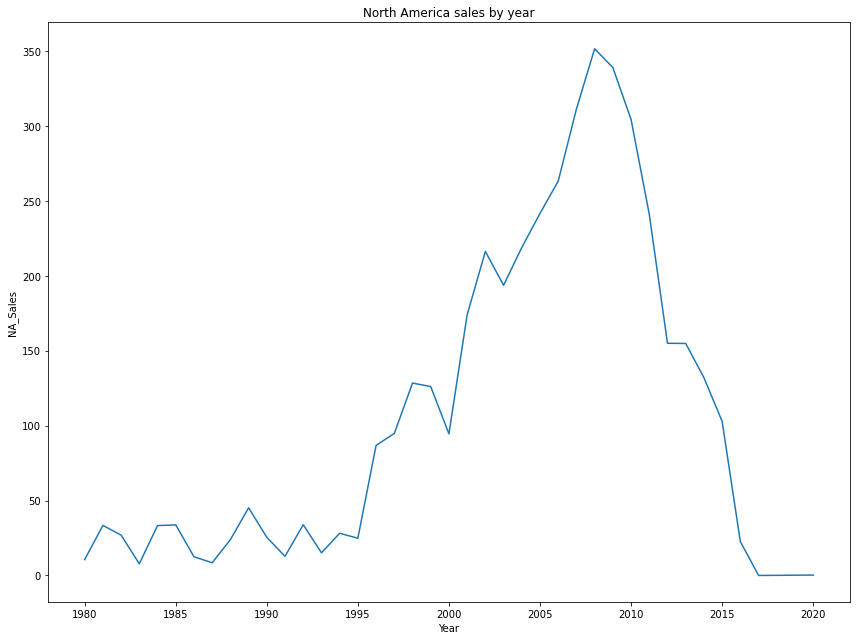

In [276]:
plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='NA_Sales',data=byyear).set(title='North America sales by year')
plt.tight_layout()

Other sales by year

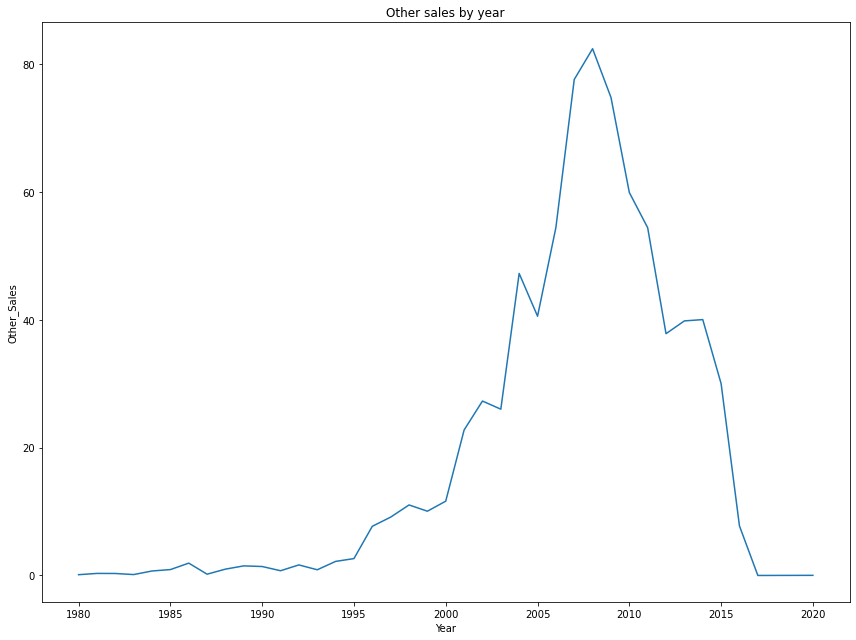

In [277]:
plt.figure(figsize=(12,9))
sns.lineplot(x='Year',y='Other_Sales',data=byyear).set(title='Other sales by year')
plt.tight_layout()